In [1]:
## Packages
'''Import all the necessary packages and modules'''

import numpy as np # package for playing with matrices
from scipy import signal as ss
import matplotlib.pyplot as plt
import sys, os # python modules for interacting with computer
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter 
import pandas as pd # useful for keeping cell structure and 2d data manipulation
import glob # helps find path 

In [2]:
## Data Directory GUI
'''Getting data directory so data can easily be imported 
using this format data = hs.load('*.dm3', stack=True) to import all dm3s in folder as a stack'''

root = Tk() # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory() # opens explorer window so you can find the folder of choice
#root.file = fieldialog.askopenfilename()
root.withdraw() # closes the tkinter window since it's unnecessary
oldcwd = os.getcwd() # saves old called working directory (place where data is drawn from) as oldcwd use os.chdir(oldcwd) to go back
os.chdir(root.directory) # sets new directory
newcwd = os.getcwd() # saves new directory name as newcwd

In [3]:
## Load Data use for .s1p data
''' Open data and set up for analysis'''
path = root.directory + '/*.s1p' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
Header = 4 #Removes string header to work with numpy array
file_shape = np.array(pd.read_csv(glob.glob(path)[0],sep=" ", header=4).values.shape) # data file size
file_shape[0]=file_shape[0] # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname, sep=" ", header=Header) # uses pandas to open files and keep structure
    #data=data.drop(data.index[END-Header:END]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [3]:
## Load Data 
''' Open data and set up for analysis'''
path = root.directory + '/*.csv' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
num_files = np.size(file_list) # number of files in the directory with the correct file type
file_shape = np.array(pd.read_csv(glob.glob(path)[0]).values.shape) # data file size
Header = 4 #Removes string header to work with numpy array
file_shape[0]=file_shape[0]-Header # new file shape after removal of header
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
for fname in file_list: #iterates through files along order of glob.glob(path)

    data = pd.read_csv(fname) # uses pandas to open files and keep structure
    data=data.drop(data.index[0:Header]) #Removes rows of header
    datapd = data.values # converts from dataframe to numpy array
    
    data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
    a+=1 # increase counter to progress through list
    

In [4]:
file_list #Used 2 cables A has chip inserted B does not Also took scan of just the connector that was on for all scans

['C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\CableBaseline.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port1.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port2.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port3.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port4.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port5.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port6.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip1Port7.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip2Port2.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip2Port3.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/RF_Chip\\Chip2Port4.s1p',
 'C:/Users/kbs1/stroboscopicTEM/Data/Bia

In [5]:
def normalize(raw):
    norm=[]
    for i in raw:
        if i<0:
            norm.append(-i/min(raw))
        elif i>0:
            norm.append(i/max(raw))
        else:
            norm.append(i)
    return norm
def lowpass_filter(YA,sample_range,filter_size): #YA data set, measured sample range, filter_size arbitrary frequency cutoff based on number of samples
                   
    r=YA.shape[0]                   
    s=sample_range #GHz
    z=np.fft.fftfreq(r)/(2*s)*r
    B=filter_size
    e=int((B)/z[1])
    t=np.linspace(0, s, r)

    fYA=np.fft.rfft(YA)
    filter_e=e
    fYAr=np.zeros(fYA.shape[0])
    fYAl=np.zeros(fYA.shape[0])
    fYAr[:filter_e]=np.real(fYA[:filter_e])
    fYAl[:filter_e]=np.imag(fYA[:filter_e])
    fYA_filt=np.array(fYAr)+np.array(1j*fYAl)
    ifY=np.fft.irfft(fYA_filt)
    return ifY

def list_around(X,rang): # X is a number rang is the range around e.g X=8 rang=2 => list [6,7,8,9,10]
    lis=list(range(int(X)-int(rang),int(X)+int(rang)))
    
    return lis

C:\Users\kbs1\AppData\Local\Continuum\anaconda3\envs\HyperSpy\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


IndexError: index 27 is out of bounds for axis 0 with size 27

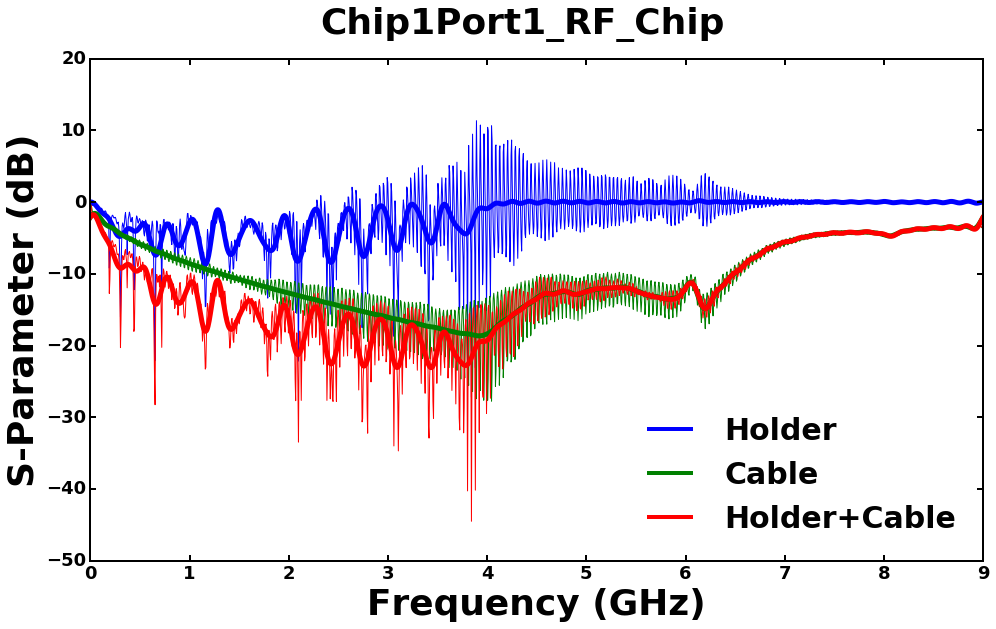

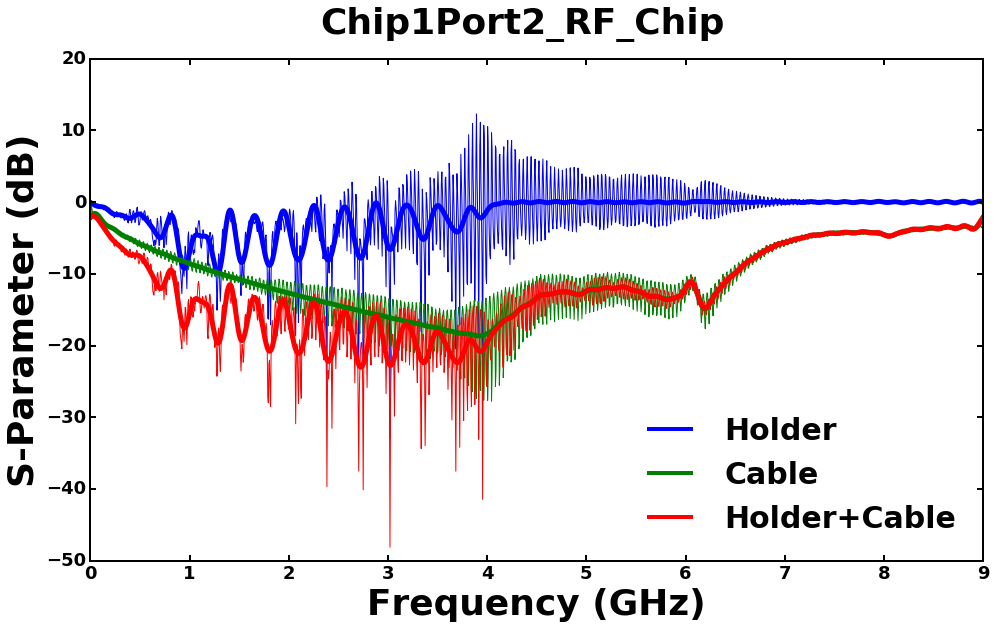

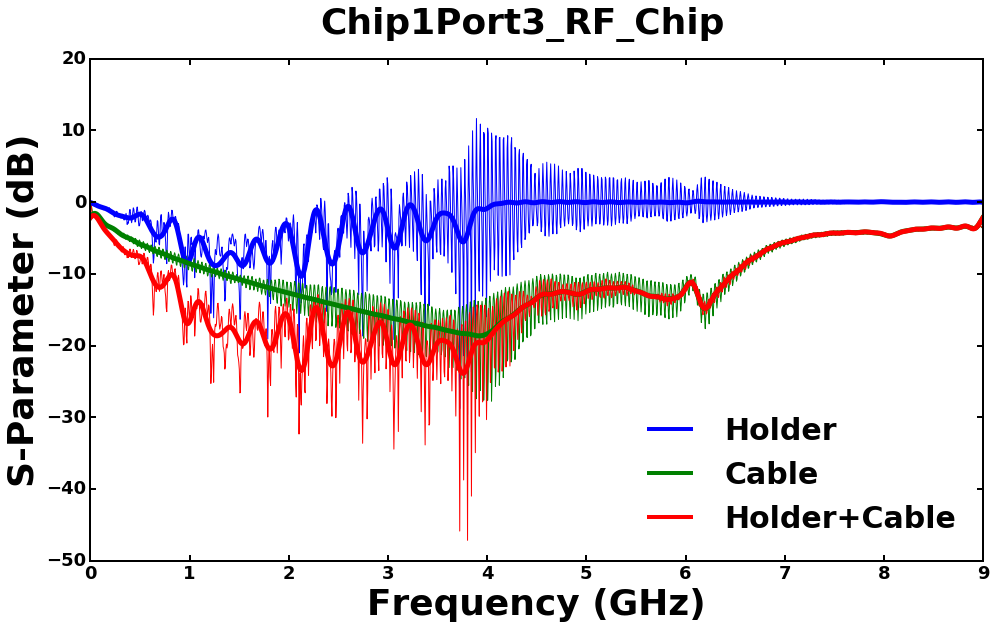

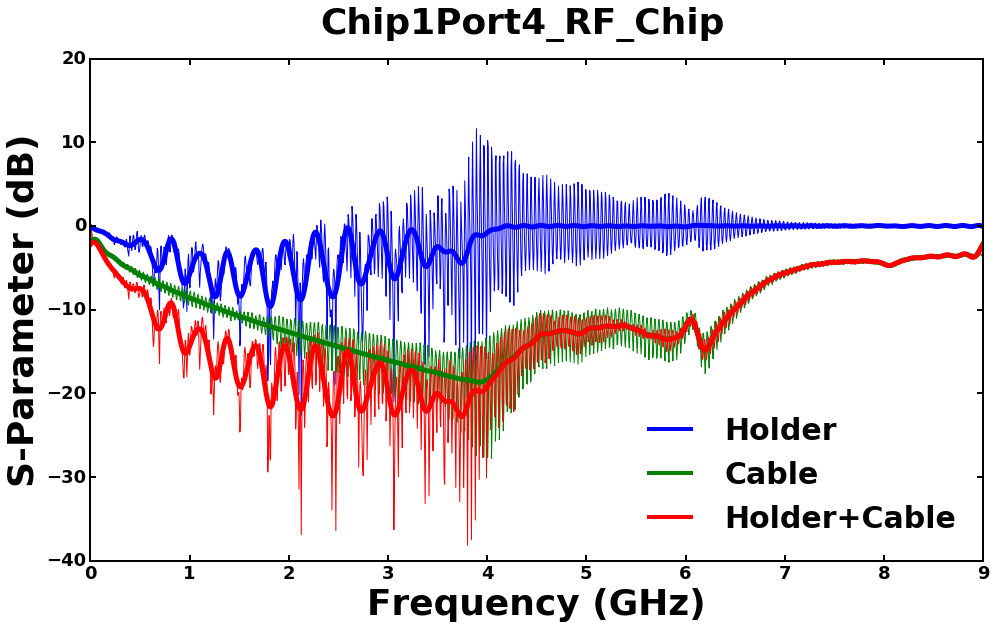

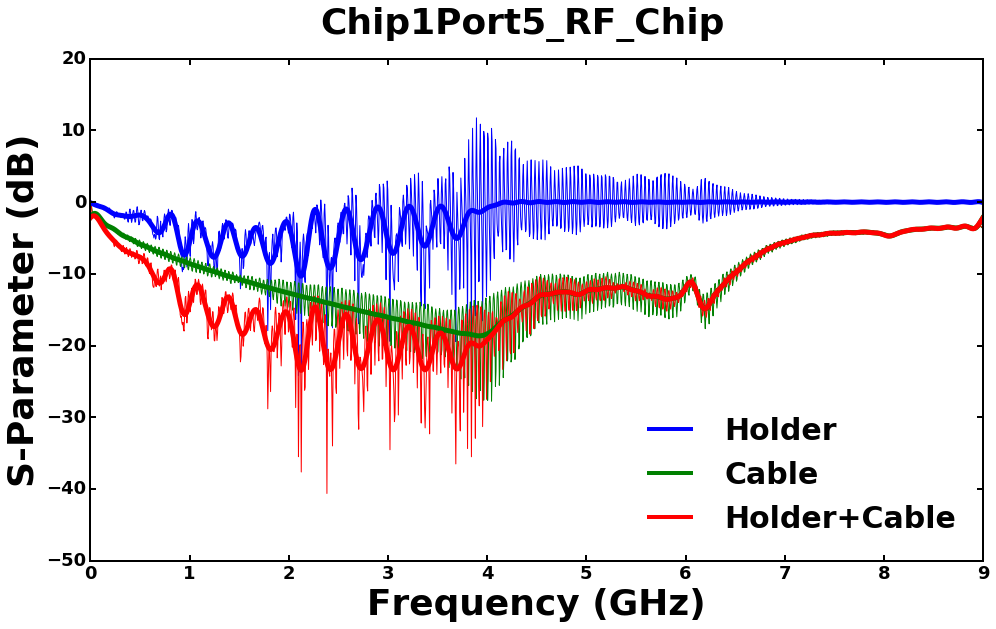

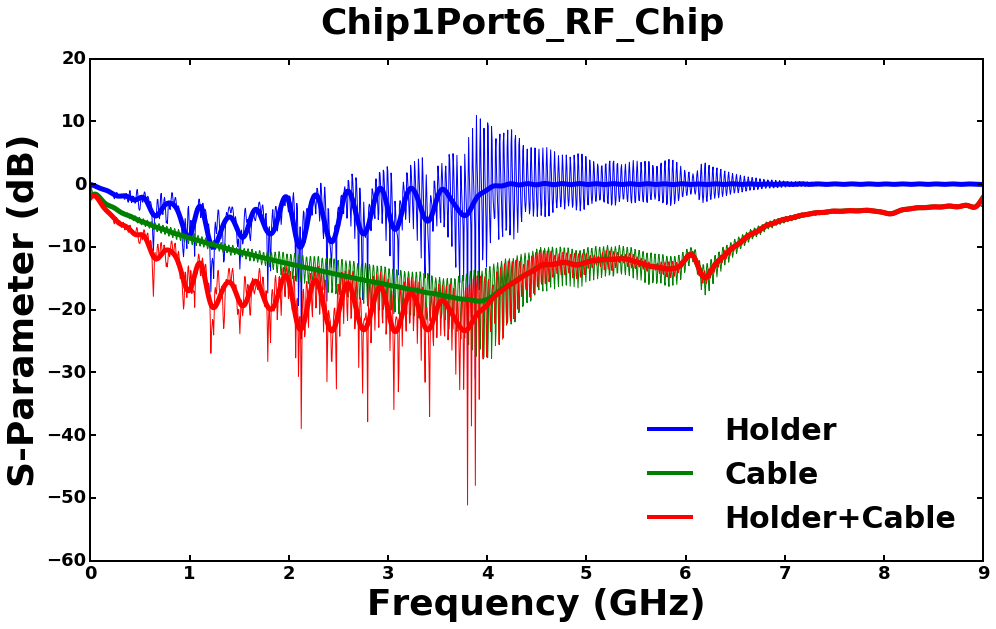

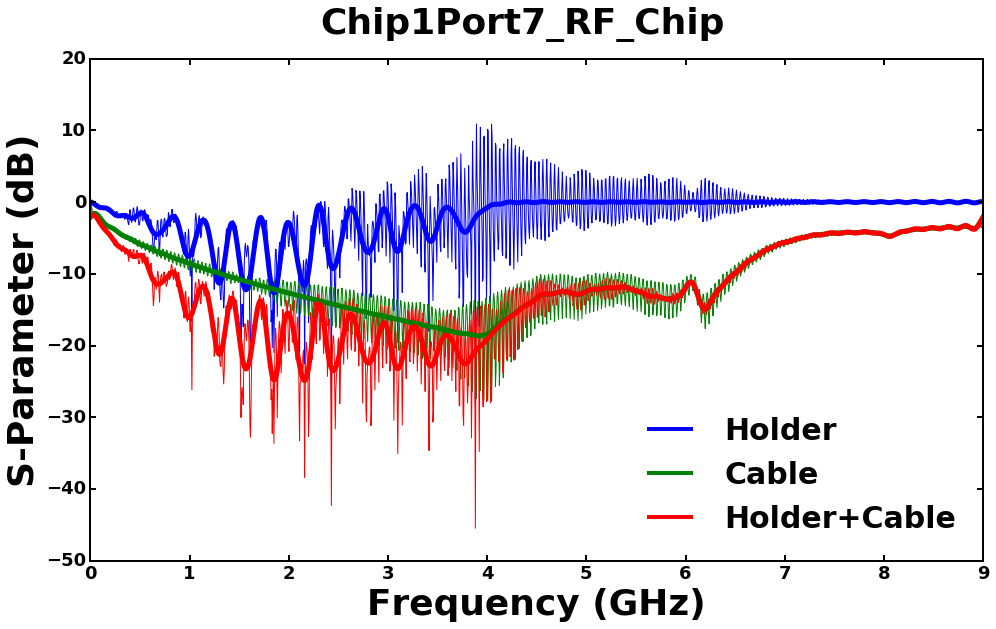

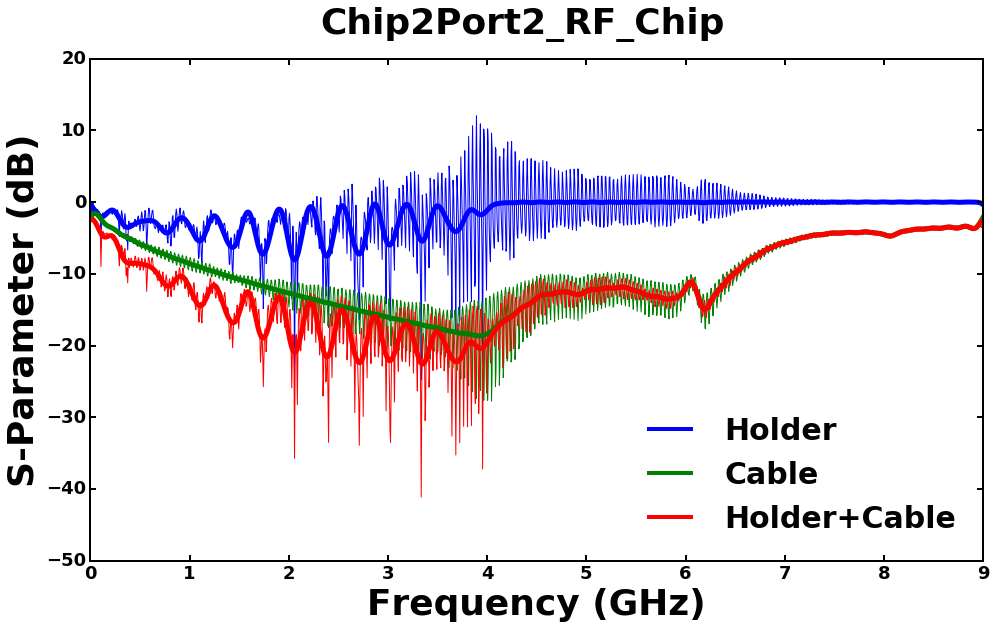

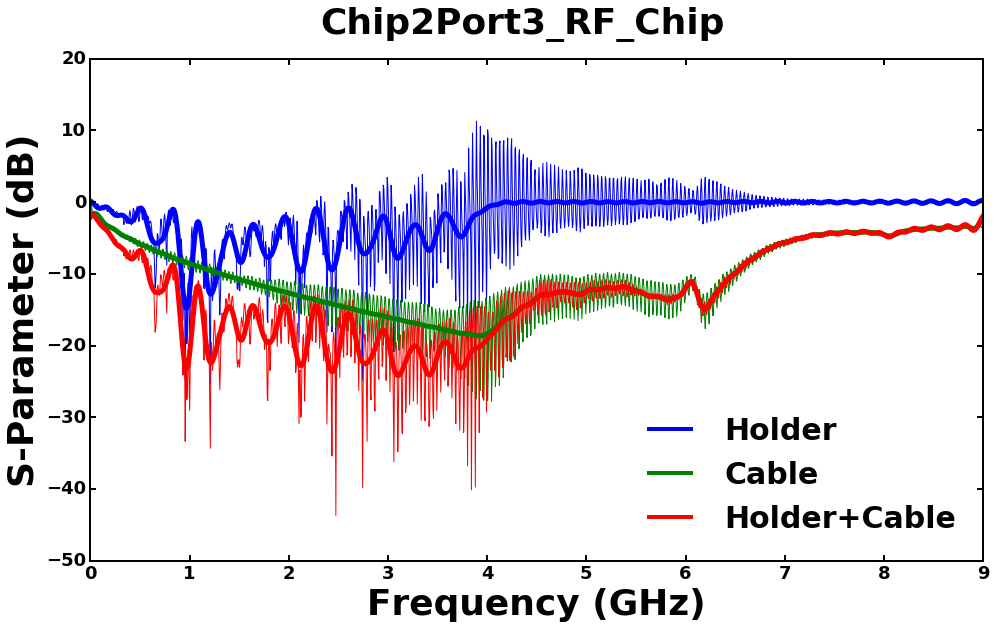

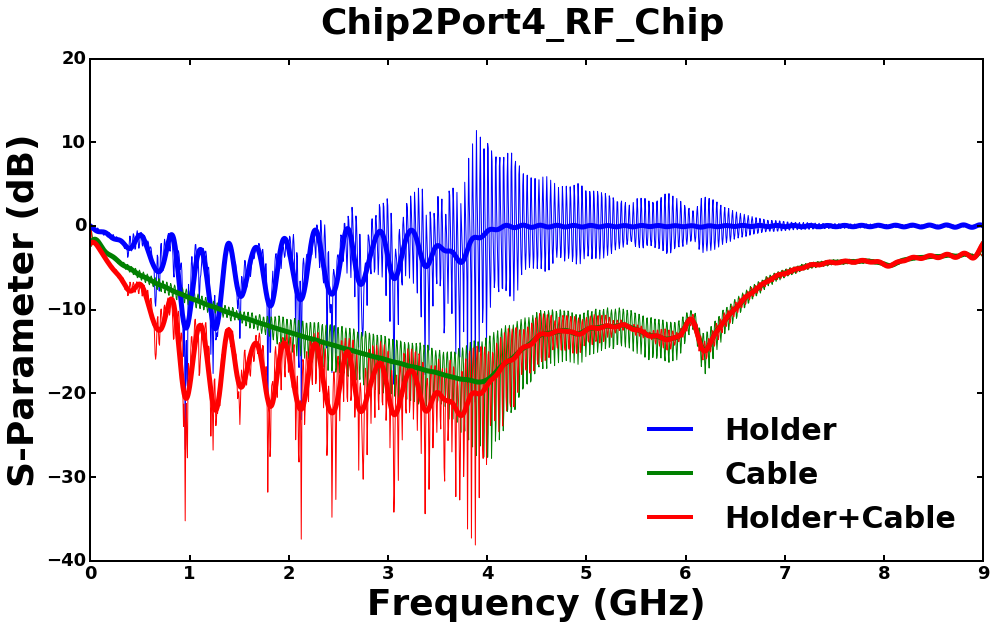

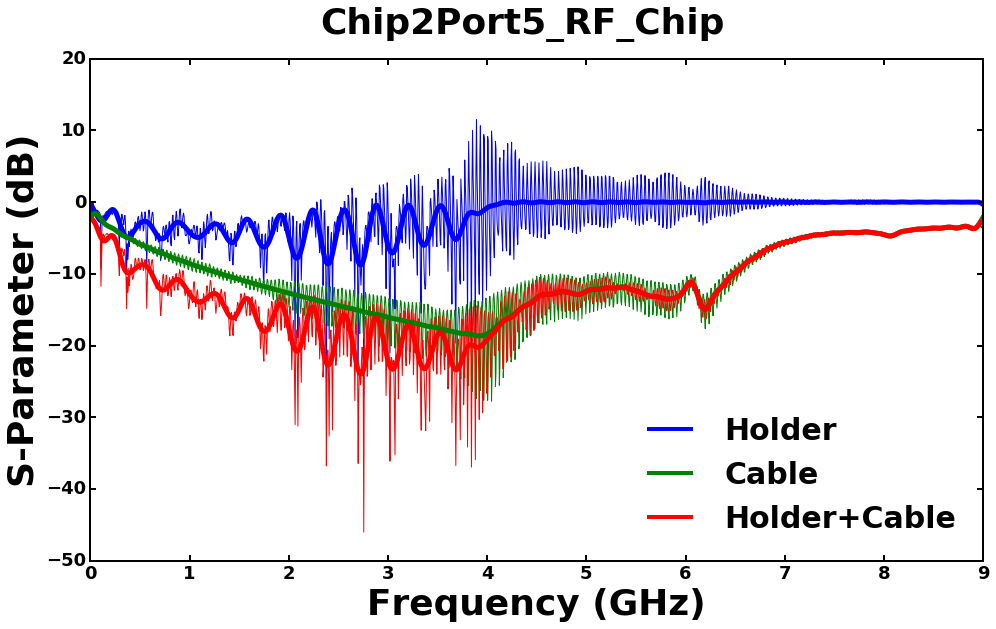

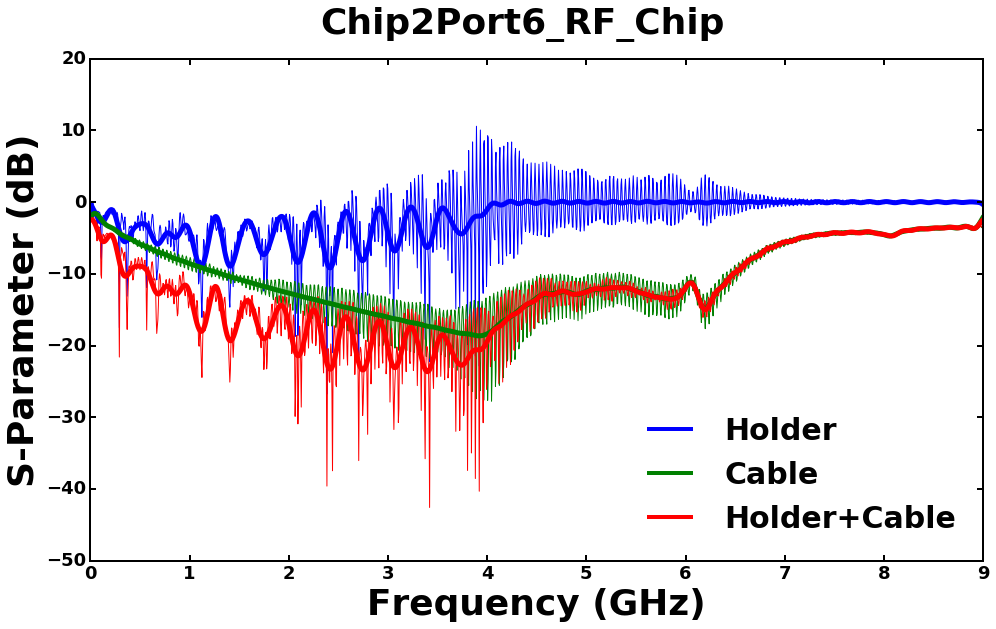

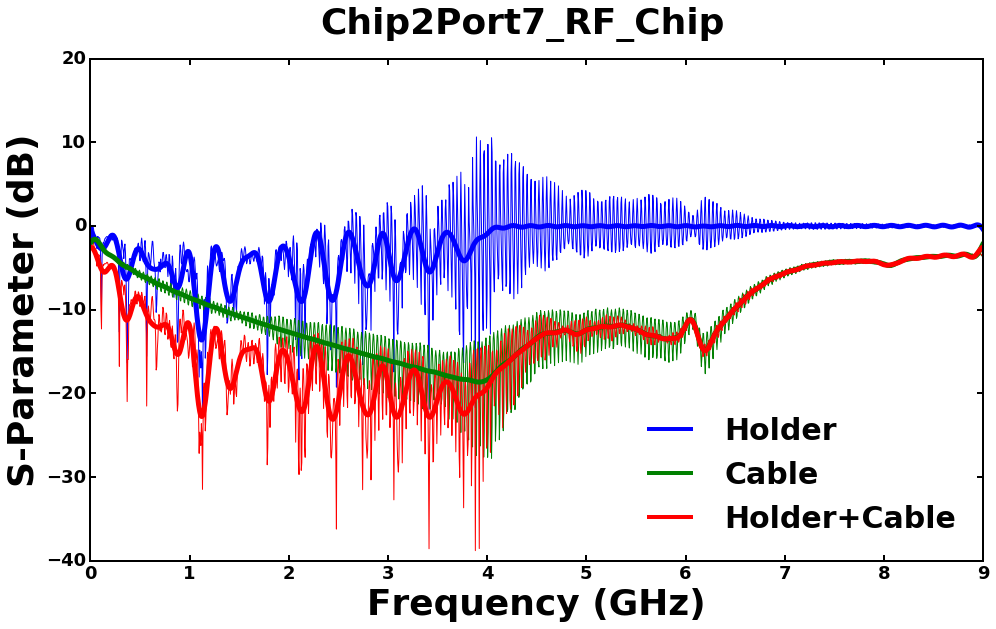

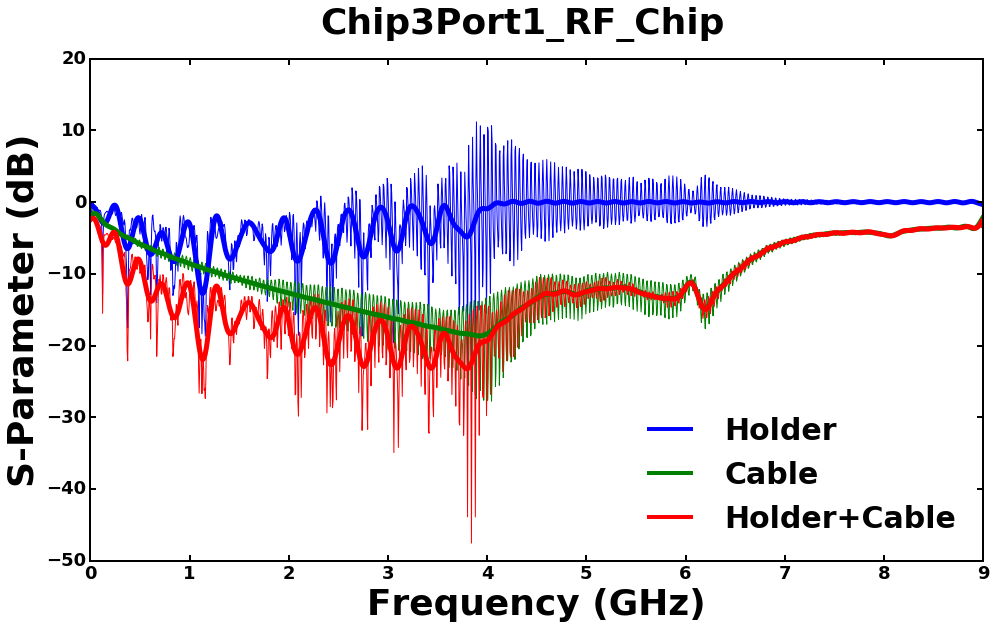

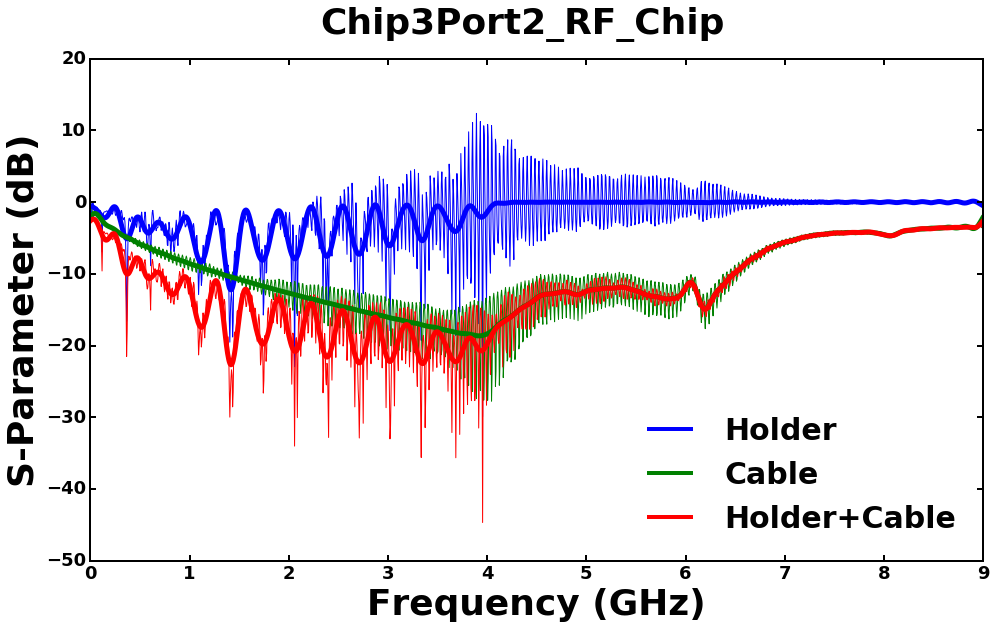

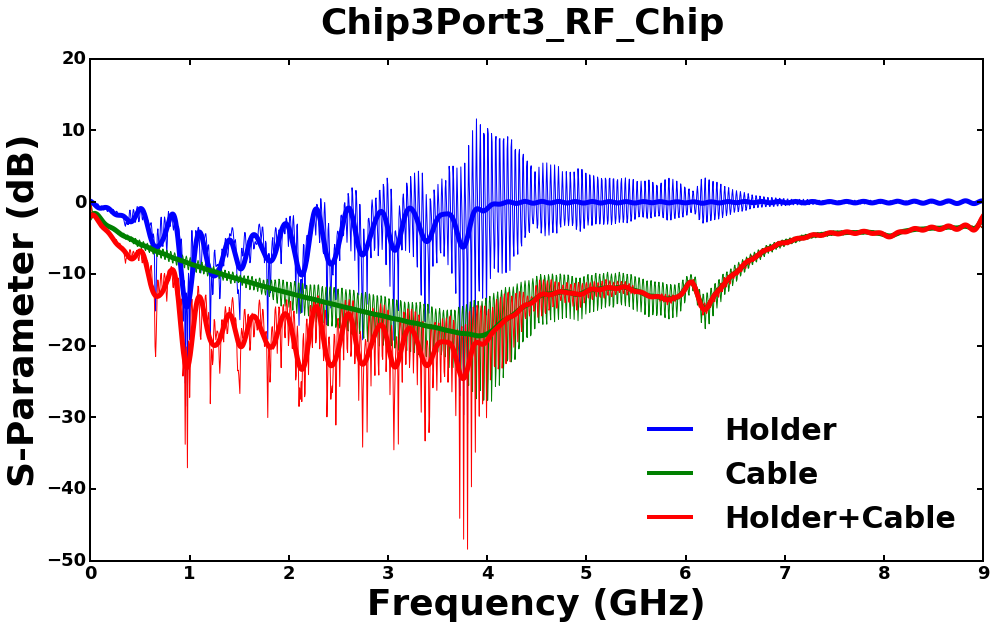

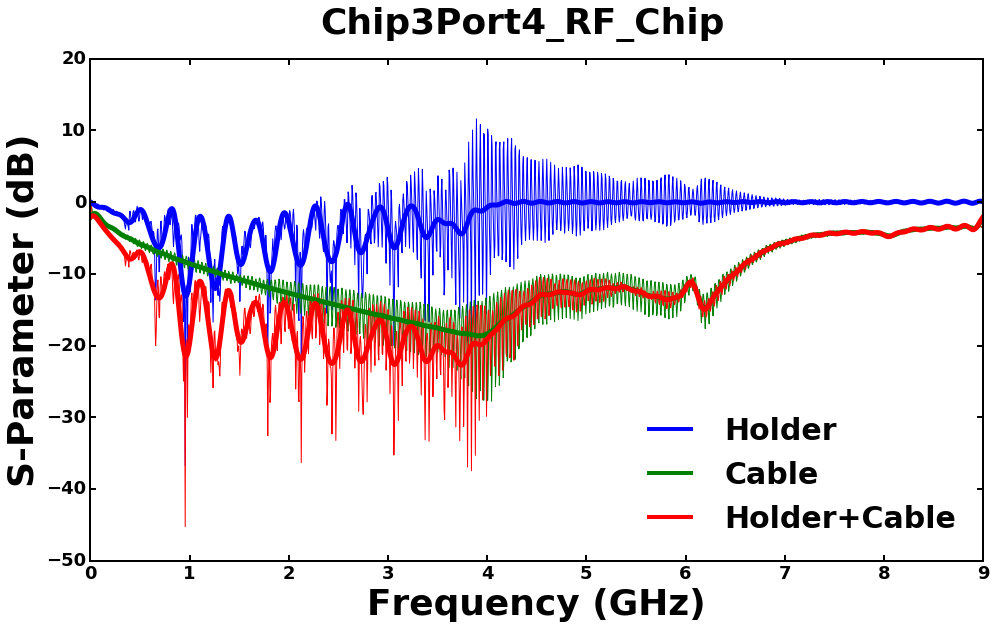

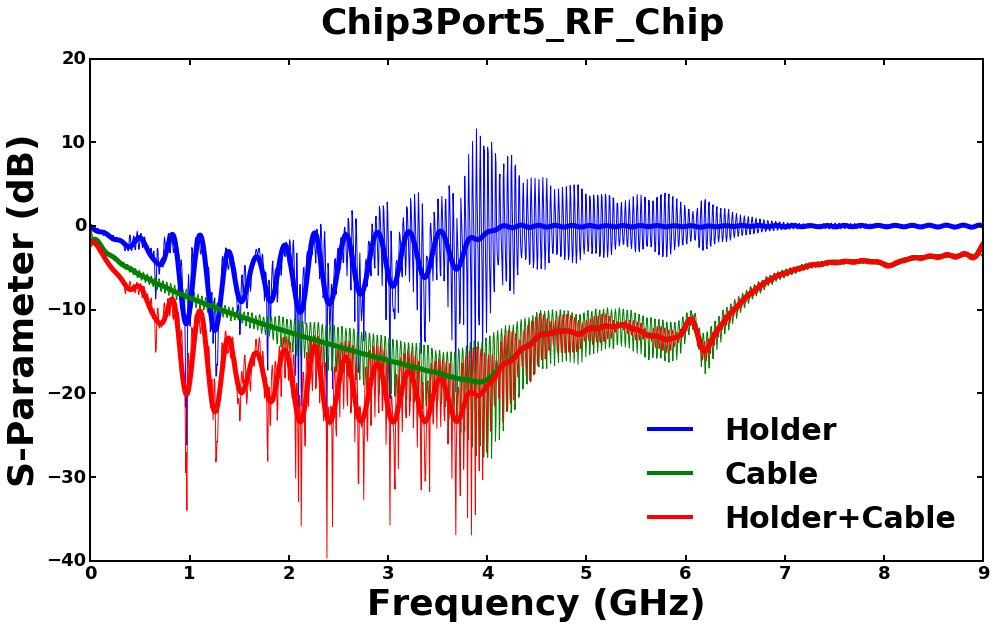

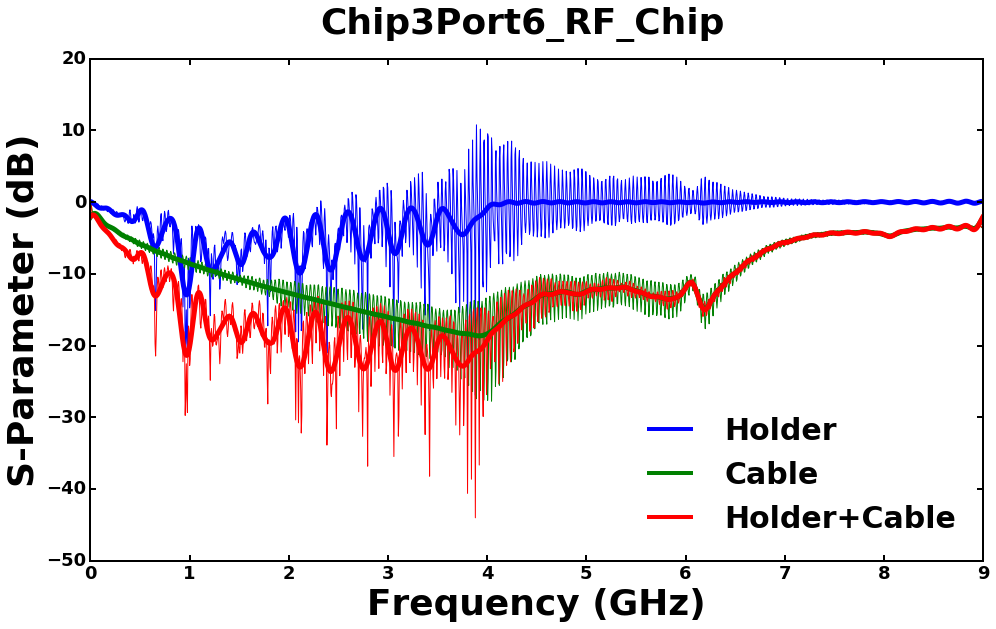

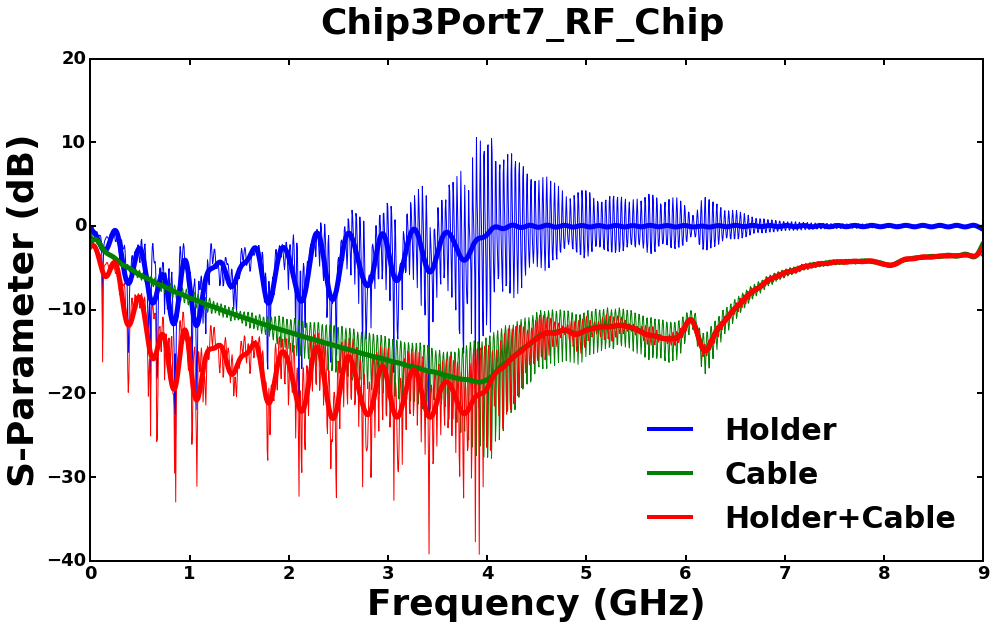

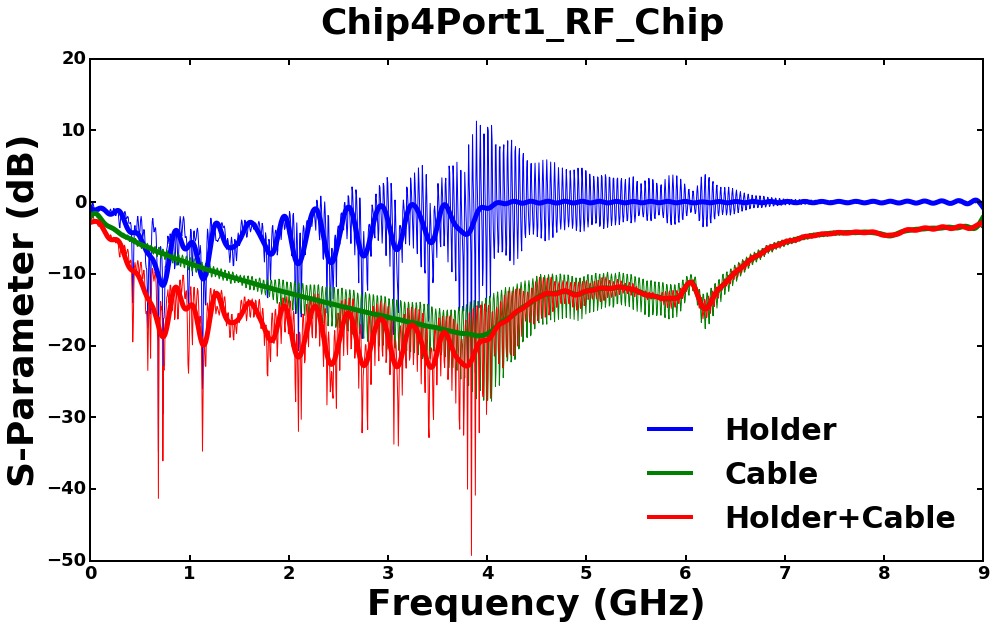

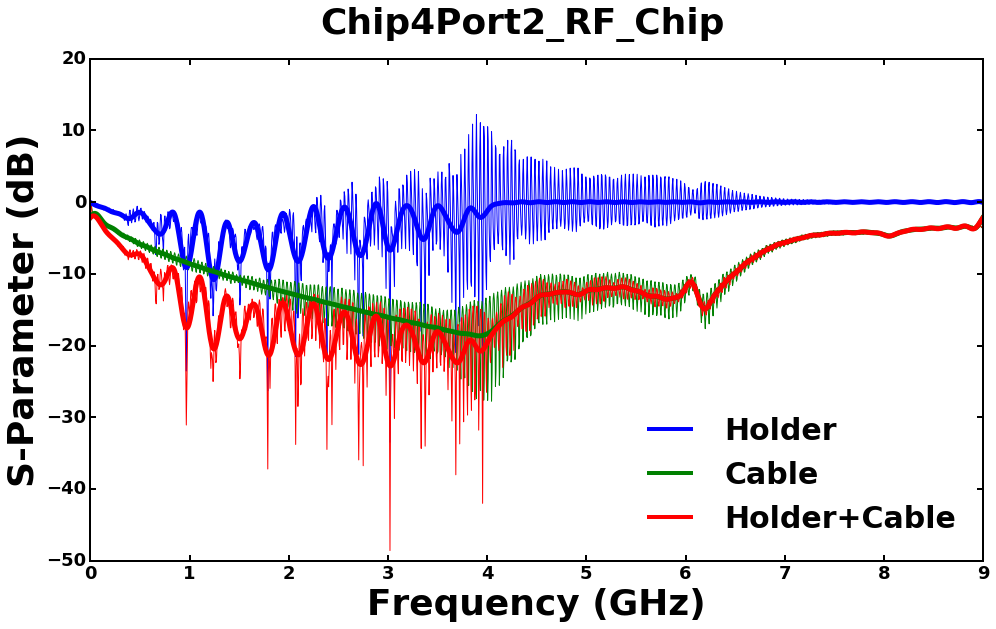

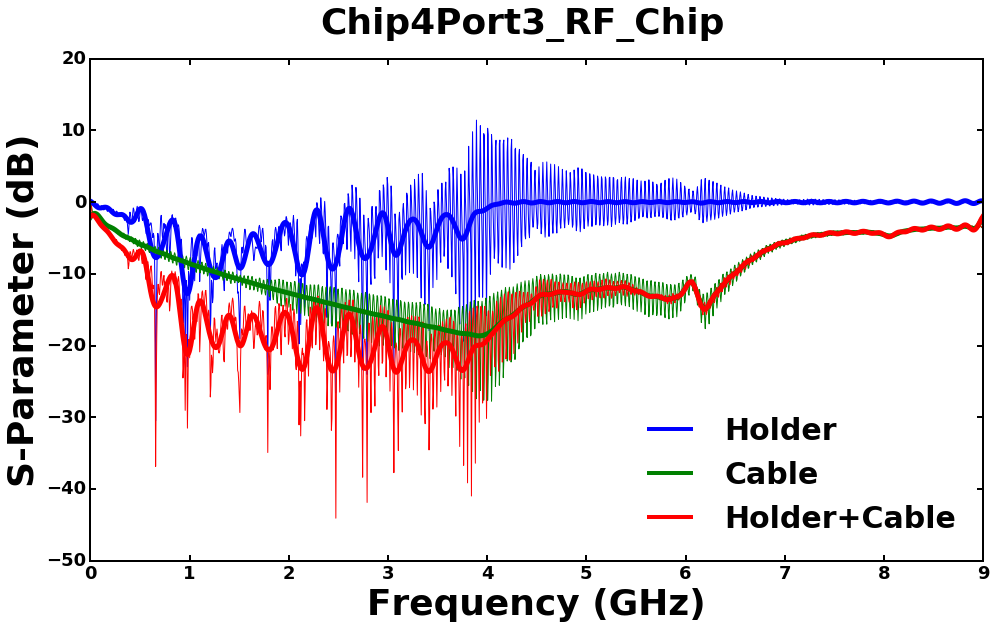

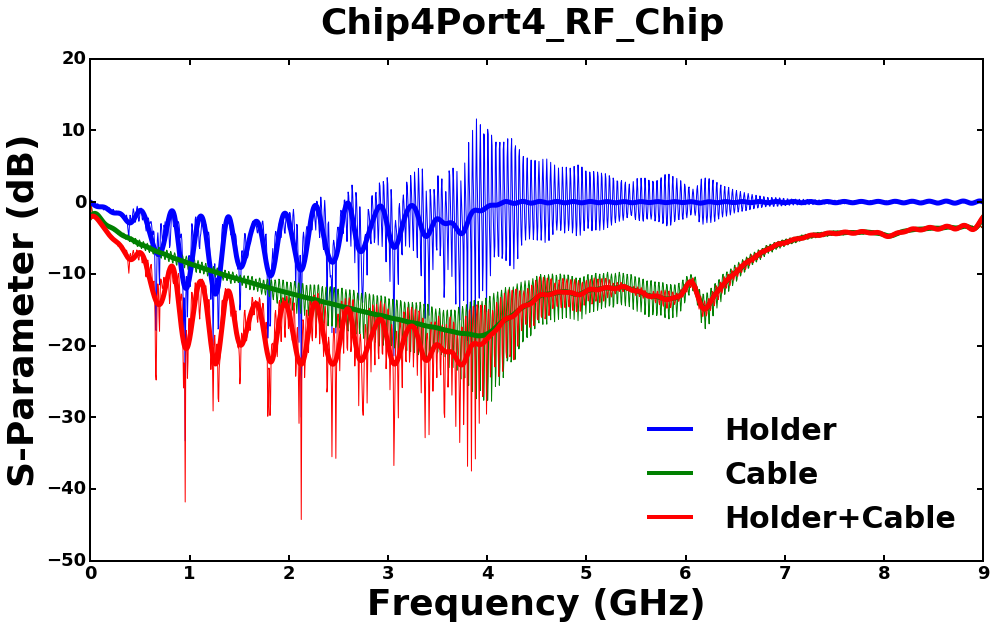

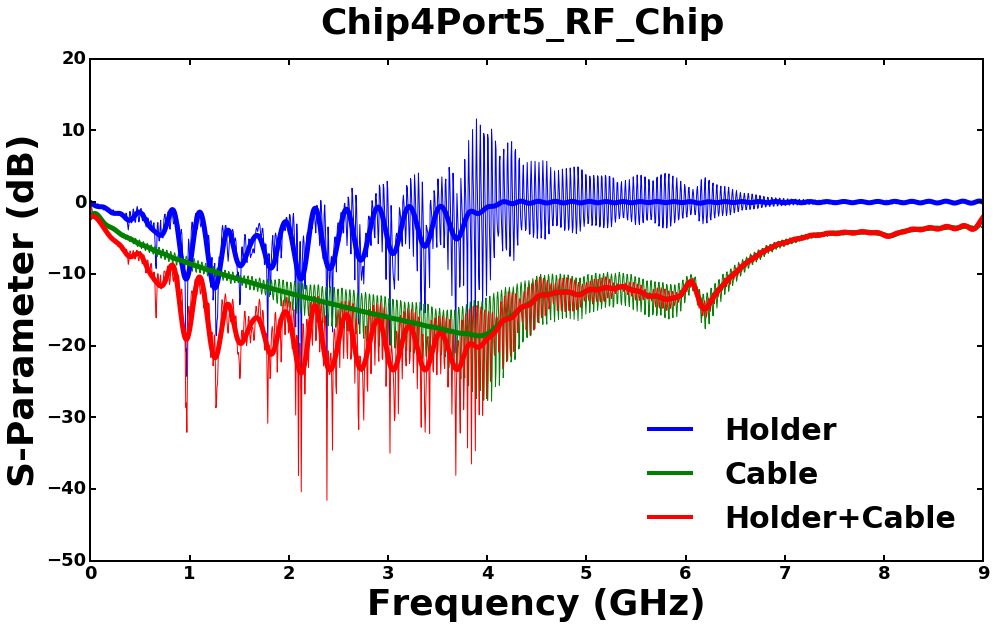

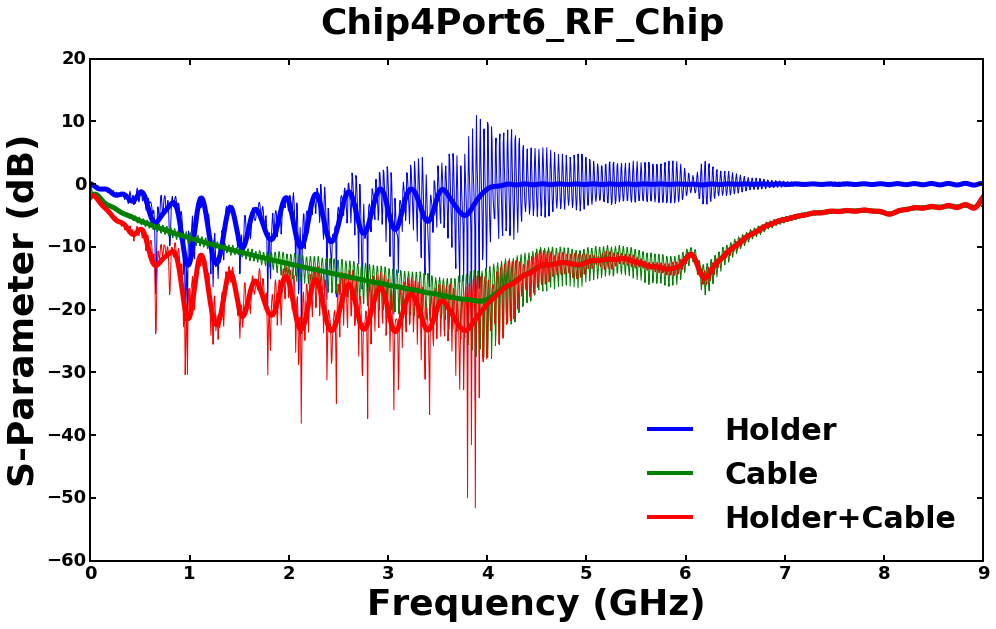

In [21]:
plot_file=np.arange(data_array.shape[2]-1)+1
#data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
#data_array_order=[3,5,7,9,11,13,15] #Used for plotting B experiments
for n in plot_file:
  
    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    x_cable=data_array[:,0,0]
    y_cable=data_array[:,1,0]
    y_cable_filt=lowpass_filter(y_cable,9,3)
    
    x_orig=data_array[:,0,n]
    y_orig=data_array[:,1,n]
    #x_filt=data_array[:,0,n] #Used for plotting B experiments as data_B_R, R=1,2
    y_orig_filt=lowpass_filter(y_orig,9,3) #Used for plotting B experiments as data_B_R, R=1,2
    
    Y_holder=y_orig-y_cable
    Y_holder_filt= y_orig_filt-y_cable_filt
    
    name_fix=plot_file[n]+1
    plot_file_name=str(n+1)
    Data_Name = os.path.basename(file_list[n]).split('.')[0] + '_RF_Chip' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('S-Parameter (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    fig=plt.plot(x_orig,Y_holder,'b-',linewidth=1, label='Holder')
    fig=plt.plot(x_cable,y_cable,'g-',linewidth=1, label='Cable')
    fig=plt.plot(x_orig,y_orig,'r-',linewidth=1, label='Holder+Cable')
    
    fig=plt.plot(x_orig[:-1],Y_holder_filt,'b-',linewidth=5)
    fig=plt.plot(x_cable[:-1],y_cable_filt,'g-',linewidth=5)
    fig=plt.plot(x_orig[:-1],y_orig_filt,'r-',linewidth=5)
    
    

    leg=plt.legend(fontsize=30, loc=4, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    #plt.show()
    save_loc=root.directory+'/'+'Updated61918'+ '/' +Data_Name+'.png'
    plt.savefig(save_loc)

In [9]:
plot_file=np.arange(data_A.shape[2])
for_counter = np.arange(2,num_files-2,2)
a=0
num_cables=7
new_file_shape1=file_shape[1]-1
new_file_shape=np.append(file_shape[0]-1,new_file_shape1)
new_file_shape_orig=np.append(file_shape[0],new_file_shape1)
cable_data_matrix = np.append(new_file_shape,num_cables)
cable_data_matrix_orig = np.append(new_file_shape_orig,num_cables)
data_Ac_1=np.empty(cable_data_matrix)  #preallocates matrix size
data_Ac_1_orig=np.empty(cable_data_matrix_orig)
data_Bc_1=np.empty(cable_data_matrix)
data_Bc_1_orig=np.empty(cable_data_matrix_orig)
data_A_1=np.empty(cable_data_matrix)
data_A_1_orig=np.empty(cable_data_matrix_orig)
data_A_2=np.empty(cable_data_matrix)
data_A_2_orig=np.empty(cable_data_matrix_orig)
data_B_1=np.empty(cable_data_matrix)
data_B_1_orig=np.empty(cable_data_matrix_orig)
data_B_2=np.empty(cable_data_matrix)
data_B_2_orig=np.empty(cable_data_matrix_orig)


for counter in for_counter:
    
    data_Ac_1[:,0,a]=data_array[:-1,0,counter] # Cable x data
    data_Ac_1_orig[:,0,a]=data_array[:,0,counter] # Orig Cable x data
    
    data_Ac_1[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3) # Cable y data
    data_Ac_1_orig[:,1,a]=data_array[:,1,counter] # Orig Cable y data
    
    data_A_1[:,0,a]=data_array[:-1,0,counter] # Cable1 and holder for A series x data   
    data_A_1_orig[:,0,a]=data_array[:,0,counter] # Cable1 and holder for A series x data 
    
    data_A_2[:,0,a]=data_array[:-1,0,counter] # Cable2 and holder for A series x data
    data_A_2_orig[:,0,a]=data_array[:,0,counter] # Cable2 and holder for A series x data  
    
    data_A_1[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3)-lowpass_filter(data_array[:,1,0],9,3) # Holder-Cable1 for A series y data 
    data_A_1_orig[:,1,a]=data_array[:,1,counter]-data_array[:,1,0] # Orig Holder-Cable1 for A series y data 
    
    data_A_2[:,1,a]=lowpass_filter(data_array[:,1,counter],9,3)-lowpass_filter(data_array[:,1,1],9,3) # Holder-Cable2 for A series y data 
    data_A_2_orig[:,1,a]=data_array[:,1,counter]-data_array[:,1,1] # Orig Holder-Cable1 for A series y data 
    
    data_B_1[:,0,a]=data_array[:-1,0,counter+1] # Cable1 and holder for A series x data  
    data_B_1_orig[:,0,a]=data_array[:,0,counter+1] # Orig Cable1 and holder for A series x data 
    
    data_B_2[:,0,a]=data_array[:-1,0,counter+1] # Cable2 and holder for A series x data
    data_B_2_orig[:,0,a]=data_array[:,0,counter+1] # Cable2 and holder for A series x data
    
    data_B_1[:,1,a]=lowpass_filter(data_array[:,1,counter+1],9,3)-lowpass_filter(data_array[:,1,0],9,3) # Holder-Cable1 for A series y data 
    data_B_1_orig[:,1,a]=data_array[:,1,counter+1]-data_array[:,1,0] # Orig Holder-Cable1 for A series y data 
    
    data_B_2[:,1,a]=lowpass_filter(data_array[:,1,counter+1],9,3)-lowpass_filter(data_array[:,1,1],9,3) # Holder-Cable2 for A series y data 
    data_B_2_orig[:,1,a]=data_array[:,1,counter+1]-data_array[:,1,1] # Orig Holder-Cable2 for A series y data 
    
    a+=1
    


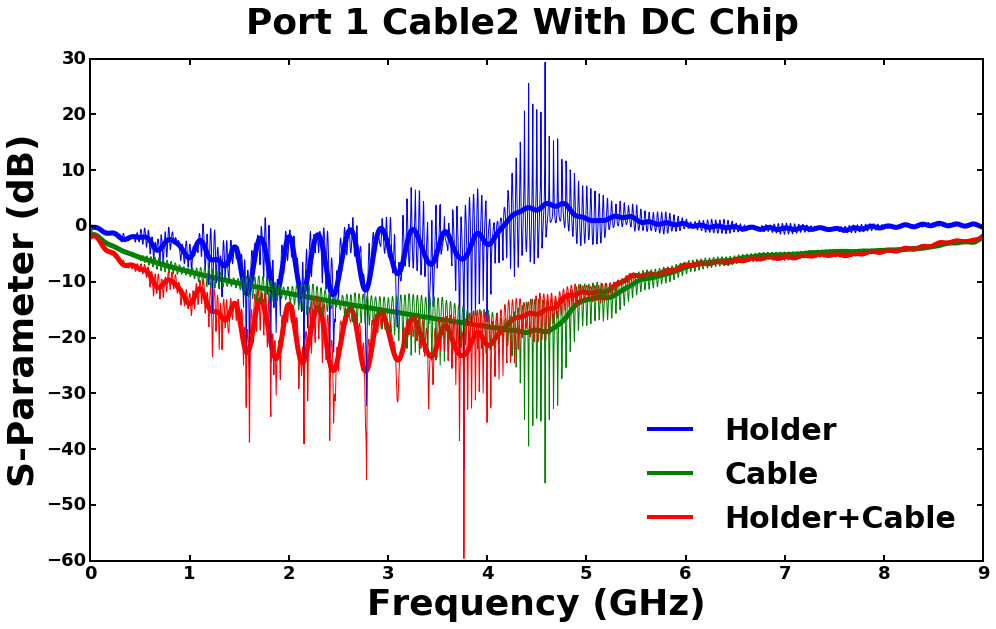

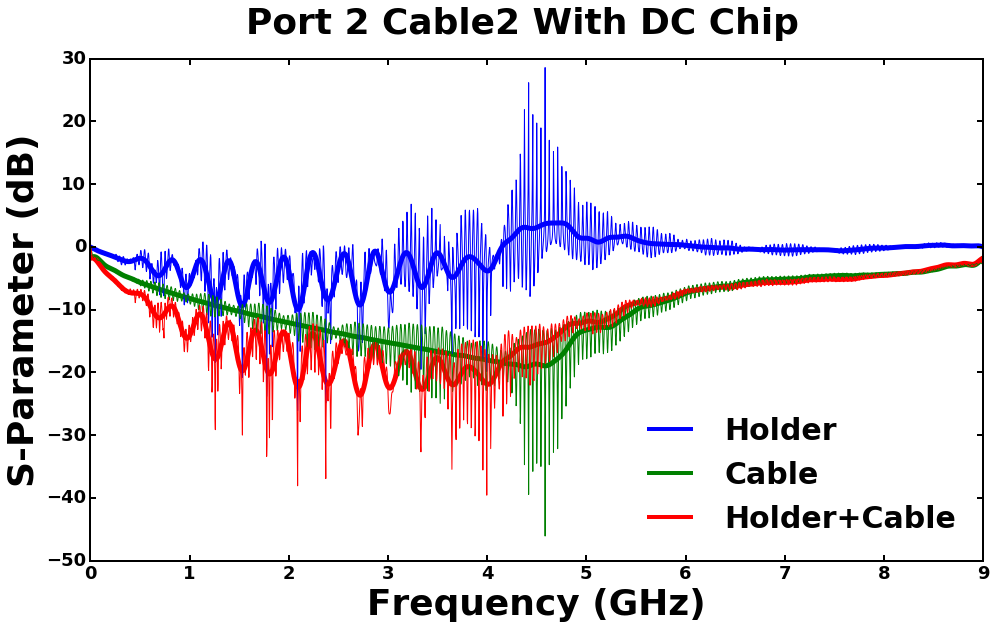

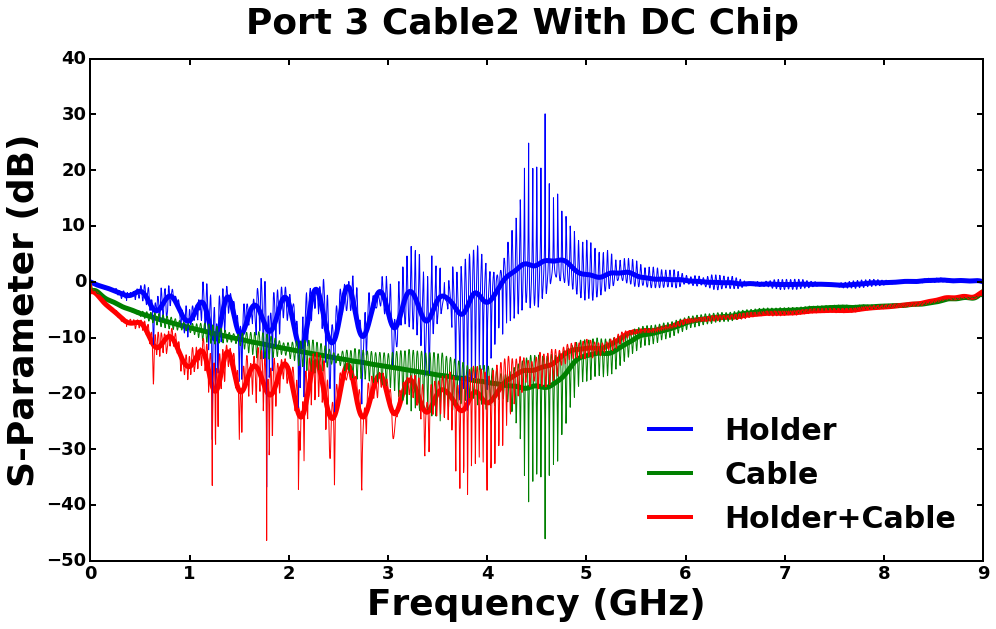

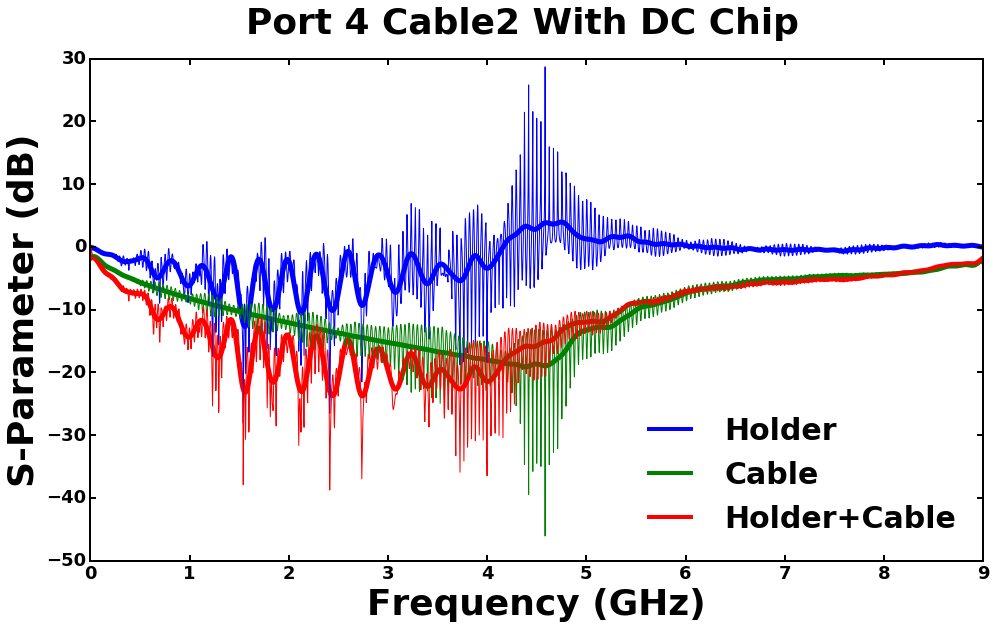

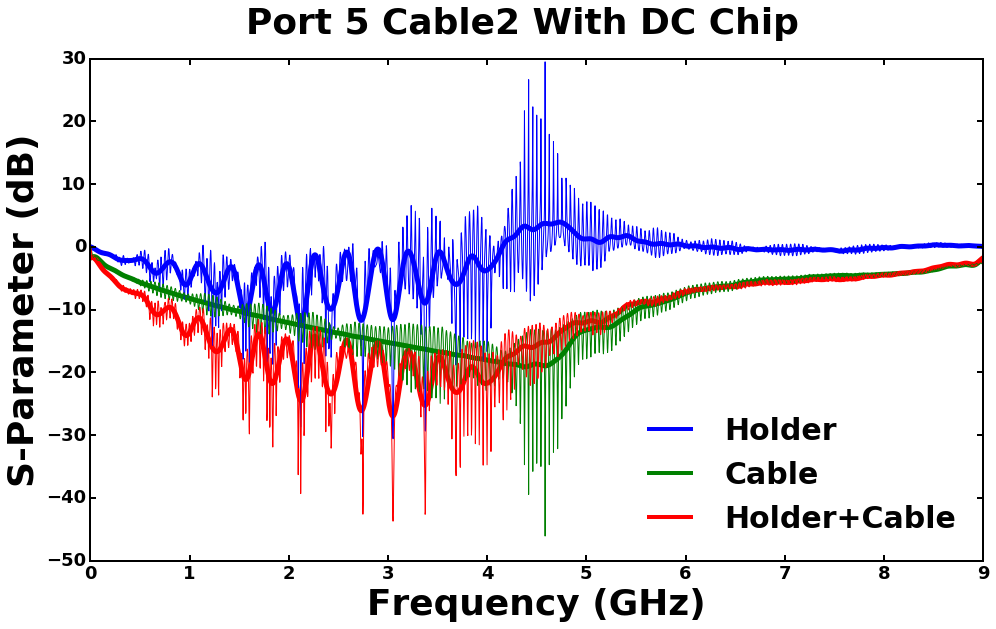

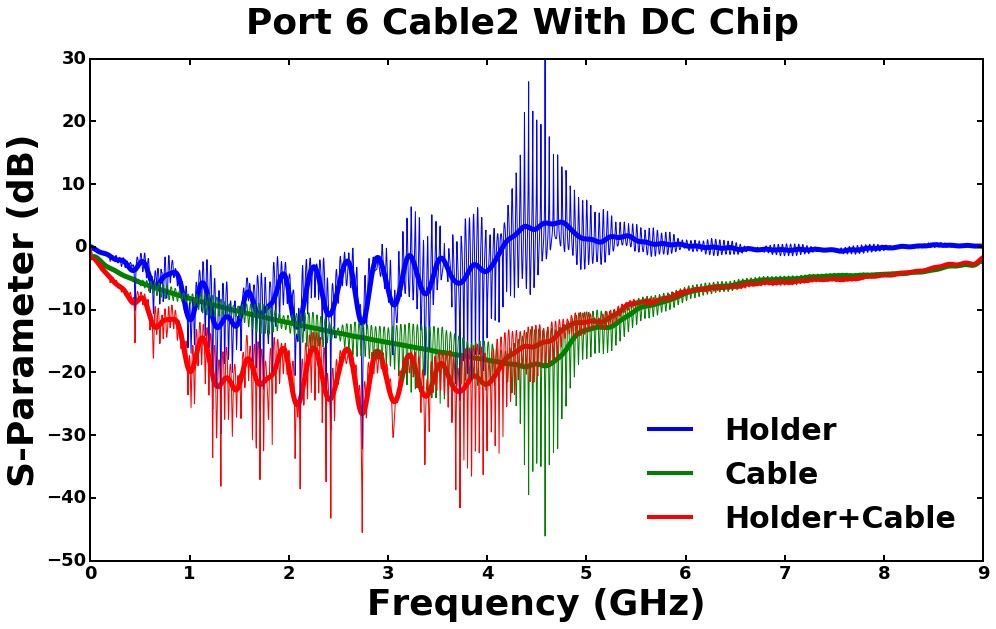

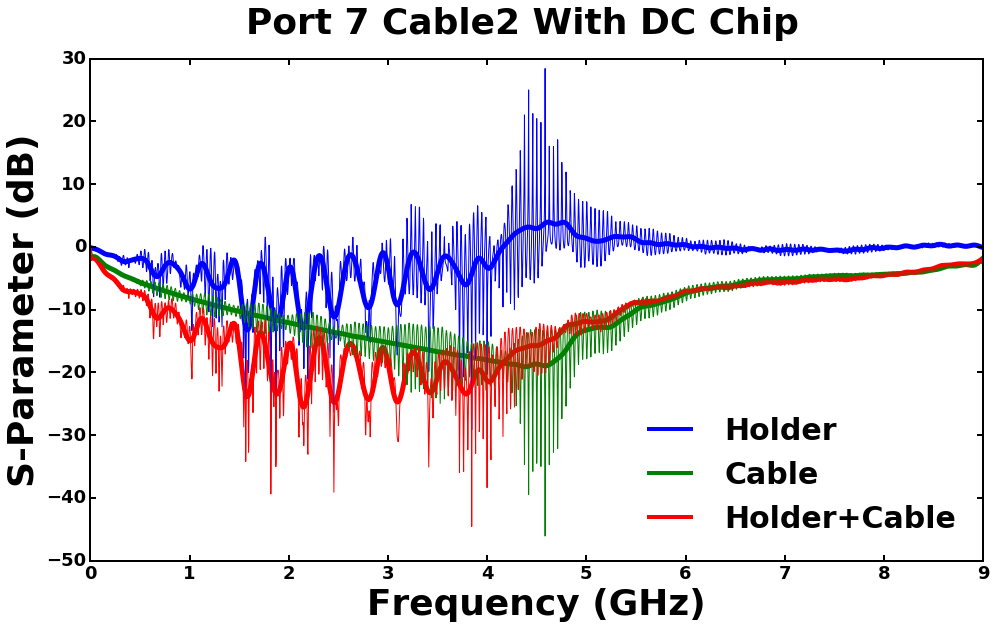

In [57]:
plot_file=np.arange(0,7)

data_array_order=[2,4,6,8,10,12,14] #Used for plotting A experiments
data_array_order1=[3,5,7,9,11,13,15] #Used for plotting B experiments
for n in plot_file:


    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    
    X=data_A_2[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    X_orig=data_A_2_orig[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    YA=data_A_2[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2    
    YA_orig=data_A_2_orig[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    YB=data_A_2[:,1,plot_file[n]]
    YB_orig=data_A_2_orig[:,1,plot_file[n]]
    
    y1c=data_Ac_1[:,1,plot_file[n]]
    y1c_orig=data_Ac_1_orig[:,1,plot_file[n]]
    
    y1_orig=data_array[:,1,1] #0 for cable 1 and 1 for cable 2 in the z position
    
    Y=YA-YB 
    Y_orig=YA_orig-YB_orig
    
    name_fix=plot_file[n]+1
    plot_file_name=str(n+1)
    Data_Name = 'Port ' + plot_file_name + ' Cable2 With DC Chip'
    #os.path.basename(file_list[data_array_order1[n]]).split('.')[0] + ' DC WithoutChip - Cable 2' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('S-Parameter (dB)', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)

    #fig=plt.plot(X,Y,'k-',label='Chip')
    fig=plt.plot(X,YA,'b-',linewidth=5, label='Holder')
    fig=plt.plot(X,y1,'g-',linewidth=5, label='Cable')
    fig=plt.plot(X,y1c,'r-',linewidth=5, label='Holder+Cable')
    
    fig=plt.plot(X_orig,YA_orig,'b-',linewidth=1)
    fig=plt.plot(X_orig,y1_orig,'g-',linewidth=1)
    fig=plt.plot(X_orig,y1c_orig,'r-',linewidth=1)
    
    

    leg=plt.legend(fontsize=30, loc=4, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    #plt.show()
    save_loc=root.directory+'/'+'Updated612518'+ '/' +Data_Name+'.png'
    plt.savefig(save_loc)

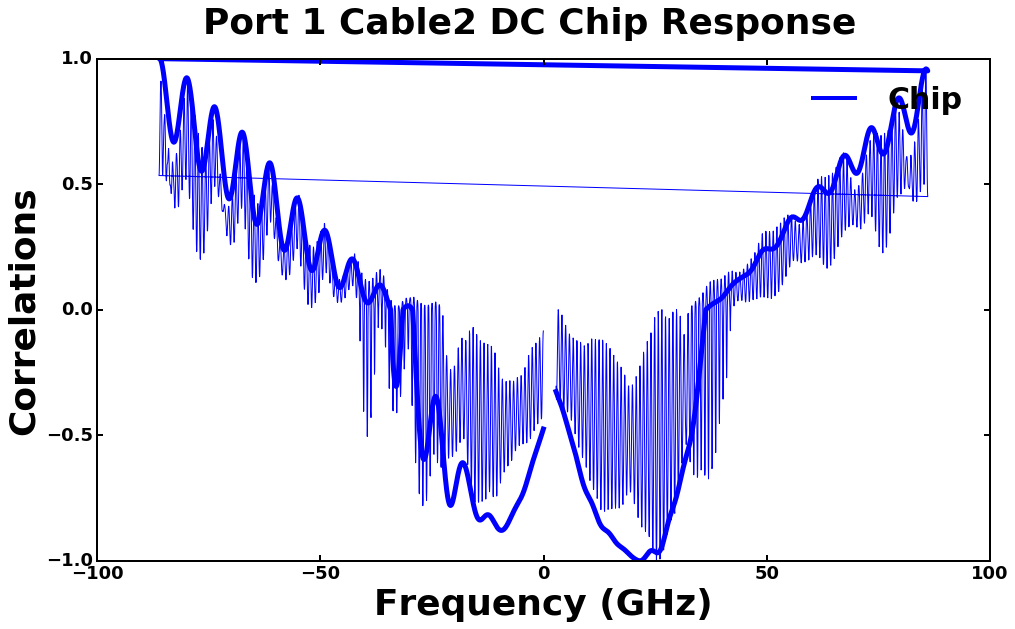

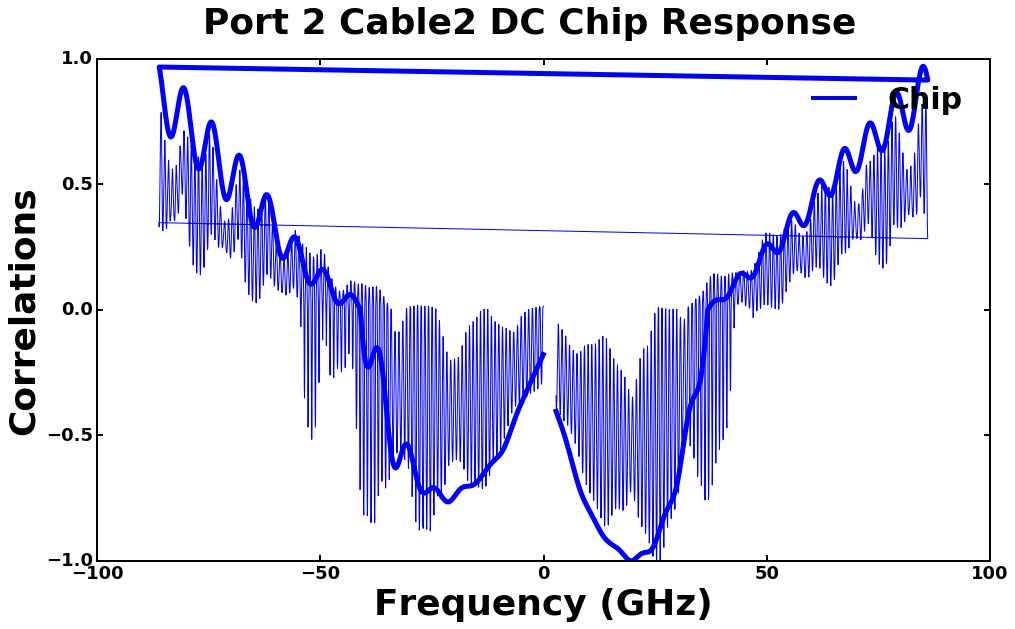

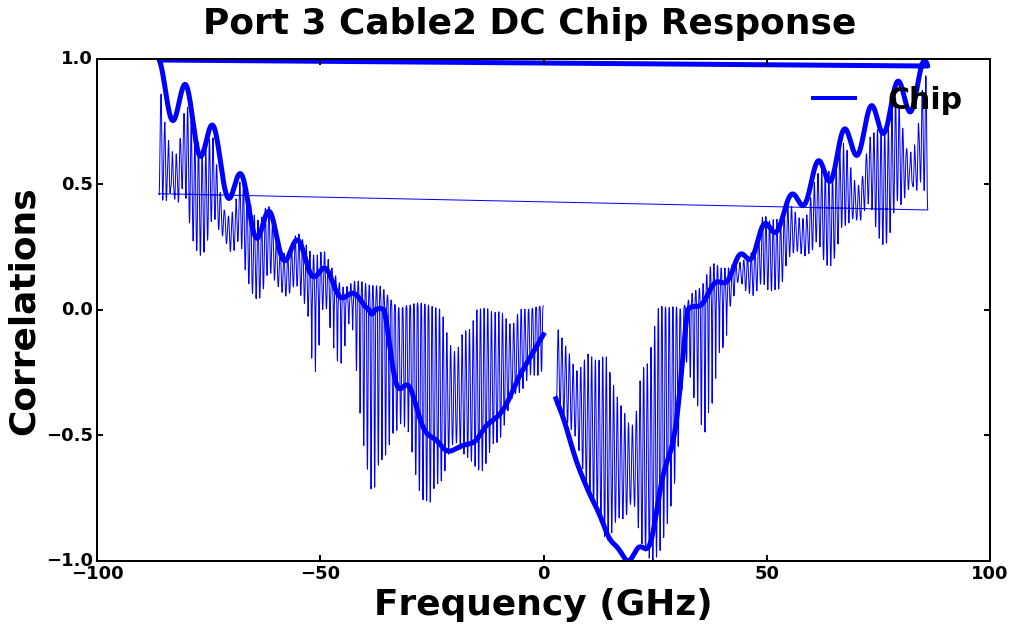

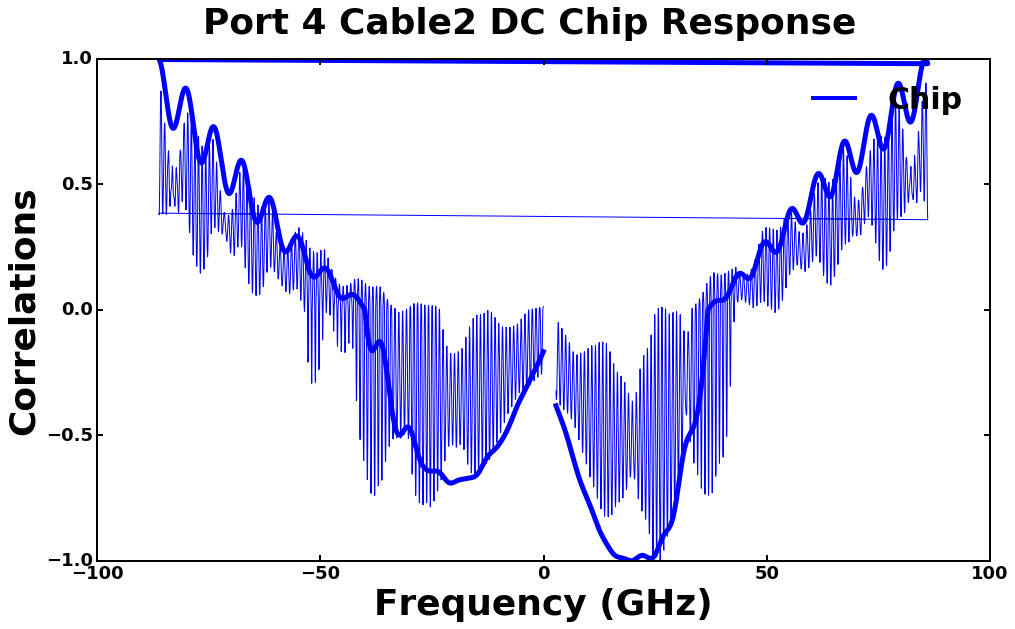

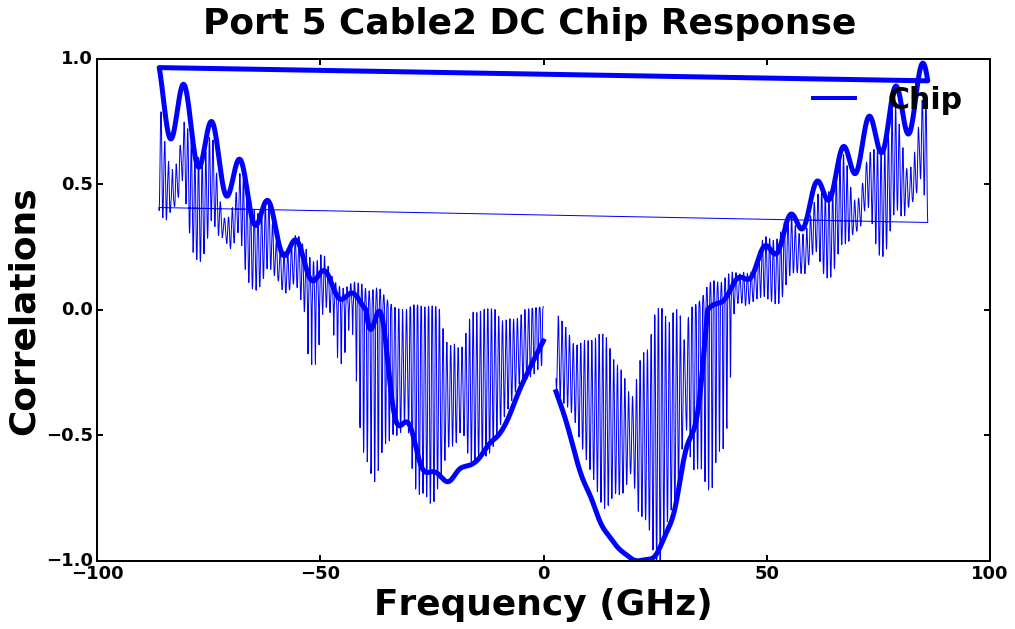

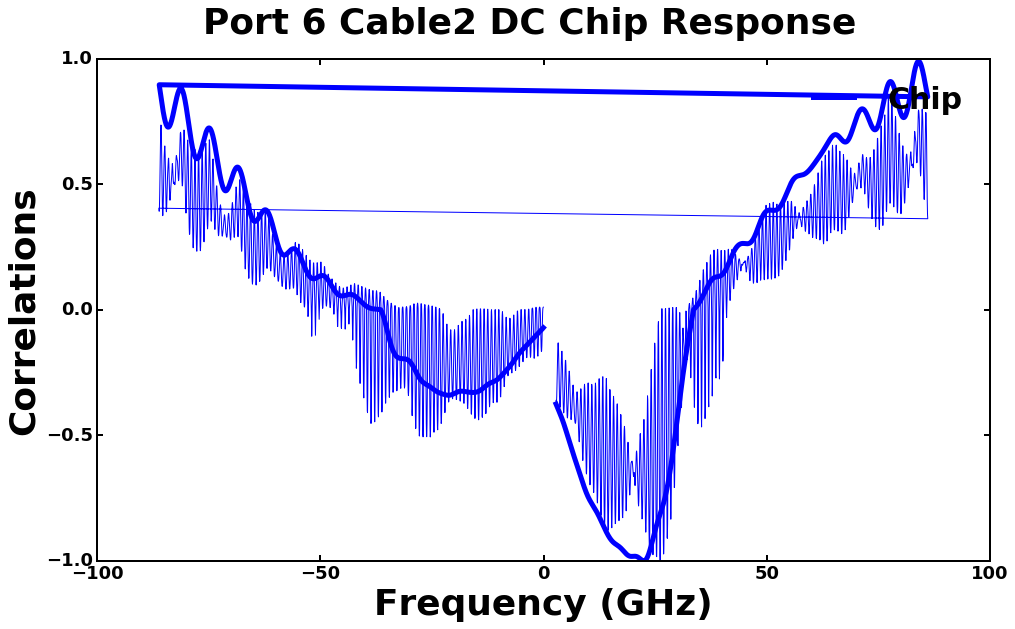

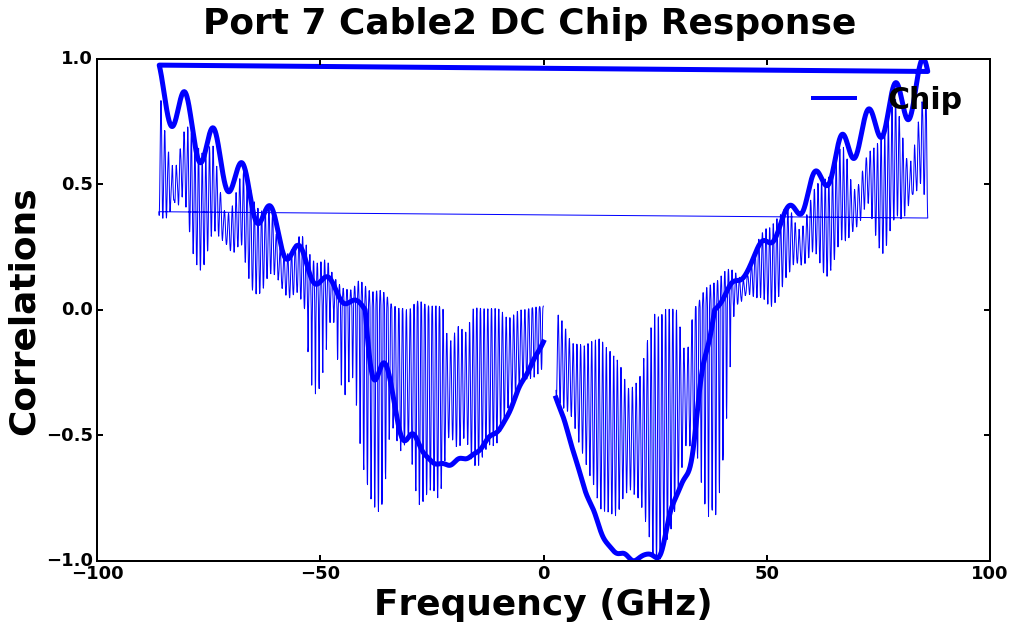

In [144]:
plot_file=np.arange(0,7)

for n in plot_file:


    #X=data_A_2[:,0,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    #Y=data_A_2[:,1,plot_file[n]] #Used for plotting A experiments as data_A_R, R=1,2
    
    XA=data_A_2[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    XA_orig=data_A_2_orig[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    XB=data_B_2[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    XB_orig=data_B_2_orig[:,0,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    YA=data_A_2[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2    
    YA_orig=data_A_2_orig[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    YB=data_B_2[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2    
    YB_orig=data_B_2_orig[:,1,plot_file[n]] #Used for plotting B experiments as data_B_R, R=1,2
    
    #Y=((YA-YB)**2/len(YA))**.5 #RMSE
    #Y_orig=((YA_orig-YB_orig)**2/len(YA_orig))**.5
    Xcorr=np.fft.fftfreq(YA.shape[0])/(2*9)*YA.shape[0]
    Y=normalize(ss.correlate(YA,YB,mode='same', method='auto'))
    Xcorr_orig=np.fft.fftfreq(YA_orig.shape[0])/(2*9)*YA_orig.shape[0]
    Y_orig=normalize(ss.correlate(YA_orig,YB_orig,mode='same', method='auto'))
    
    name_fix=plot_file[n]+1
    plot_file_name=str(n+1)
    Data_Name = 'Port ' + plot_file_name + ' Cable2 DC Chip Response'
    #os.path.basename(file_list[data_array_order1[n]]).split('.')[0] + ' DC WithoutChip - Cable 2' #Change name whether R=1,2 and With to Without if A or B

    plt.rc('font', weight='bold')
    plt.rcParams['axes.linewidth']=2
    plt.rcParams['figure.figsize'] = (16,9)

    fig = plt.figure()
    fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

    ax = fig.add_subplot(111)

    ax.set_xlabel('Frequency (GHz)', fontsize=36, fontweight='bold')
    ax.set_ylabel('Correlations', fontsize=36, fontweight='bold')

    ax.tick_params(axis='both', which='major', labelsize=18, width=2, length=6)
    ax.tick_params(axis='both', which='minor', labelsize=18, width=2, length=6)
    ax.xaxis.get_offset_text().set_visible(False)
    
    mid_size=50
    mid_remove=list_around(np.shape(Xcorr)[0]/2,mid_size)
    
    #fig=plt.plot(X,Y,'k-',label='Chip')
    fig=plt.plot(np.delete(Xcorr,mid_remove)[mid_size:],np.delete(Y,mid_remove)[mid_size:],'b-',linewidth=5, label='Chip')
    #fig=plt.plot(XA,YA,'g-',linewidth=5, label='Cable')
    #fig=plt.plot(XB,YB,'r-',linewidth=5, label='Holder+Cable')
    
    fig=plt.plot(np.delete(Xcorr_orig,mid_remove)[mid_size:],np.delete(Y_orig,mid_remove)[mid_size:],'b-',linewidth=1)
    #fig=plt.plot(XA_orig,YA_orig,'g-',linewidth=1)
    #fig=plt.plot(XB_orig,YB_orig,'r-',linewidth=1)
    
    

    leg=plt.legend(fontsize=30, loc=1, frameon=False)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(4.0)

    plt.show()
    #save_loc=root.directory+'/'+'Updated612518'+ '/' +Data_Name+'.png'
    #plt.savefig(save_loc)

In [ ]:

fig1=plt.plot(z[0:fYA_filt.shape[0]],fYA_filt,'b-', label='Holder FFT')
fig1=plt.plot(z[0:fYA.shape[0]],efft[0:fYA.shape[0]],'g-', label='Holder FFT')
#fig1=plt.plot(fX,fY,'g-', label='Cable FFT')
#fig1=plt.plot(fX,fY1c,'r-', label='Cable + Holder FFT')
leg=plt.legend(fontsize=30, loc='best', frameon=False)

for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)
    
#plt.ylim(ymax=1500)  # adjust the max leaving min unchanged
#plt.ylim(ymin=-1500)  # adjust the min leaving max unchanged
#plt.xlim(xmax=.2)  # adjust the max leaving min unchanged
#plt.xlim(xmin=0)  # adjust the min leaving max unchanged
plt.show()

In [ ]:
st=np.std(fY)
Num_stds=2
maxima=fY[fY>Num_stds*st]
minima=fY[fY<-Num_stds*st]


b=np.empty(maxima.shape[0])
c=np.empty(minima.shape[0])

for i in np.arange(maxima.shape[0]):
    
    b[np.int(i)]=np.nonzero(fY==maxima[np.int(i)])[0][0]
    print('Maximum values of ' + str(fX[b[np.int(i)]]))
    
for i in np.arange(minima.shape[0]):
    
    c[i]=np.nonzero(fY==minima[i])[0][0]
    print('Minimum values of ' + str(fX[c[i]]))

In [ ]:
ifY=np.fft.irfft(fYA_filt)
plt.plot(ifY)

In [32]:
asdff= 'hi ' + plot_file_name +'hi'

In [94]:
 Xcorr=np.fft.fftfreq(YA.shape[0])/(2*9)*YA.shape[0]

In [8]:
plot_file=np.arange(data_array.shape[2])
plot_file

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27])

In [34]:
Data_Name = 'Port ' + plot_file_name + ' DC No Chip'

In [40]:
root.directory

'C:/Users/kbs1/stroboscopicTEM/Data/Biasing Holder/Raw_Data/DC_Chip_And_Holder'

In [78]:
YA_orig.std()

4.6171923066158937

In [70]:
Y=np.correlate(YA,YB,mode='same')

In [13]:
Y_holder.shape[0]
x_orig.shape[0]

1601

In [108]:
A=np.array([1,2,3,4,5])

In [118]:
np.delete(A,[1,3])

array([1, 3, 5])

In [142]:
Xcorr

array([ 0.        ,  0.05555556,  0.11111111, ..., -0.16666667,
       -0.11111111, -0.05555556])

In [138]:
def list_around(X,rang): # X is a number rang is the range around e.g X=8 rang=2 => list [6,7,8,9,10]
    lis=list(range(int(X)-int(rang),int(X)+int(rang)))
    
    return lis

In [139]:
list_around(np.shape(Xcorr)[0]/2,5)

[1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604]

In [6]:
plot_file=np.arange(data_A.shape[2])

NameError: name 'data_A' is not defined